In [167]:
from sklearn import datasets
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [168]:
i=datasets.load_iris()

In [169]:
df = pd.DataFrame(i.data, columns = i.feature_names) #dataframe form of dataset
df["species"] = i.target

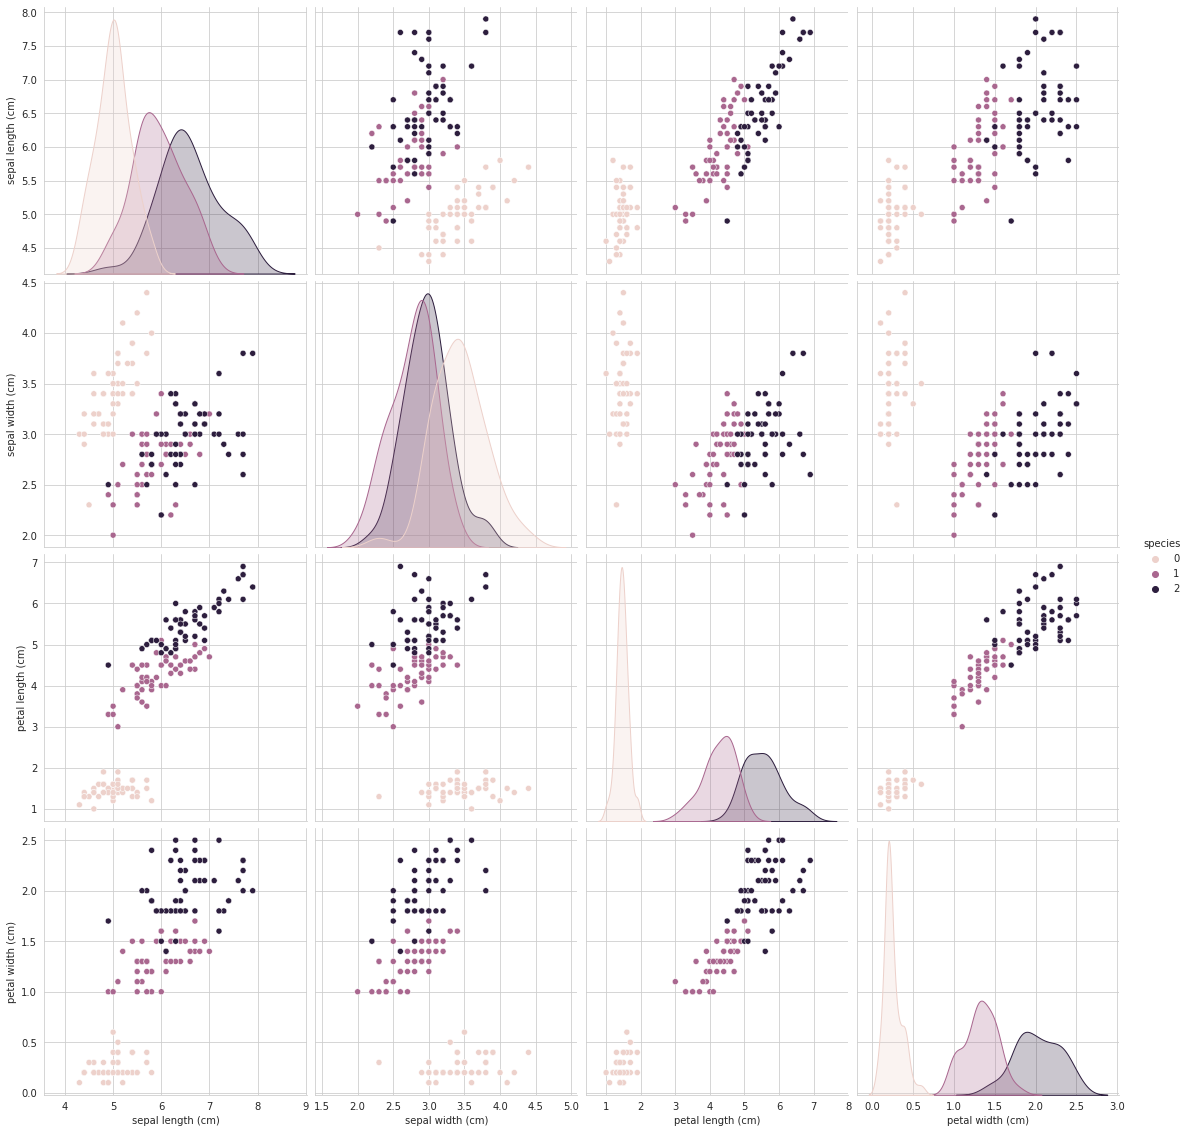

In [211]:
sns.pairplot(df,hue= "species",height=4) #visaulisation of data

In [170]:
print(i.DESCR)
a=i.data[:, [2, 3]]
b=i.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [171]:
df = pd.DataFrame(i.data, columns = i.feature_names)
df['species'] = i.target

In [172]:
list(i.target_names)

['setosa', 'versicolor', 'virginica']

In [173]:
list(i.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [174]:
from sklearn import preprocessing
s=preprocessing.scale(a)
print(s)

[[-1.34022653e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.39706395e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.16971425e+00 -1.05217993e+00]
 [-1.34022653e+00 -1.18381211e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.44707648e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.31544430e+00]
 [-1.34022653e+00 -1.44707648e+00]
 [-1.51073881e+00 -1.44707648e+00]
 [-1.45390138e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.05217993e+00]
 [-1.39706395e+00 -1.05217993e+00]
 [-1.34022653e+00 -1.18381211e+00]
 [-1.16971425e+00 -1.18381211e+00]
 [-1.28338910e+00 -1.18381211e+00]
 [-1.16971425e+00 -1.31544430e+00]
 [-1.28338910e+00 -1.05217993e+00]
 [-1.56757623e+00 -1.31544430e+00]
 [-1.16971425e+00 -9.20547742e-01]
 [-1.05603939e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.31544430e+00]
 [-1.22655167e+00 -1.05217993e+00]
 [-1.28338910e+00 -1.31544430e+00]
 [-1.34022653e+00 -1

In [175]:
a_train,a_test,b_train,b_test=train_test_split(s,b,test_size=0.4,random_state=0)


In [176]:
#Tuning SVM hyperparameters by using GridSearchCV with cross validation
from sklearn.svm import SVC
s1 = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
s1.fit(a_train,b_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [177]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf',gamma=0.01)
scores = cross_val_score(svc, a, b, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.         0.93333333 1.         1.         1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]
0.9666666666666668


In [178]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, a, b, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())

[1.         0.93333333 1.         0.93333333 1.         0.86666667
 0.93333333 0.93333333 1.         1.        ]
0.96


In [179]:
print(a_test.shape)

(60, 2)


In [180]:
print(s1.score(a_train,b_train)) #accuracy of training data

0.9777777777777777


In [181]:
print(s1.score(a_test,b_test)) #accuracy of test data

0.9333333333333333


In [182]:

p=s1.predict(a_test)



In [183]:
#calculation of root mean square error
rmse= sqrt(mean_squared_error(p, b_test)) 
print(rmse)


0.2581988897471611


In [184]:
from sklearn.metrics import classification_report
print(classification_report(b_test,p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        23
           2       1.00      0.81      0.89        21

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [185]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(b_test,p))

[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]


In [186]:
#Tuning SVM hyperparameters by using GridSearchCV with cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
g1 = GridSearchCV(SVC(), param_grid, refit = True, verbose=3)
g1.fit(a_train, b_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.944, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.944, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=1.000, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.944, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.944, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.722, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.778, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [187]:
p2= g1.predict(a_test)
print(classification_report(b_test, p2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        23
           2       1.00      0.81      0.89        21

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [188]:
#default RBF kernel
from sklearn import metrics
svc=SVC(kernel='rbf')
svc.fit(a_train,b_train)
p3=svc.predict(a_test)
print('Accuracy Score:')
print(metrics.accuracy_score(b_test,p3))

Accuracy Score:
0.9333333333333333


In [189]:
#taking different gamma values for rbf kernel
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, a, b, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.96, 0.96, 0.96, 0.8866666666666667]


Text(0, 0.5, 'Cross-Validated Accuracy')

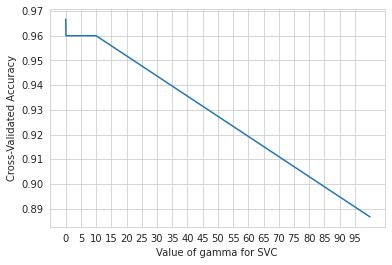

In [190]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

In [191]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, a, b, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.96]


Text(0, 0.5, 'Cross-Validated Accuracy')

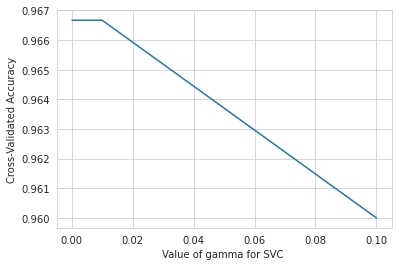

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [193]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, a, b, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9666666666666668, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.96]


Text(0, 0.5, 'Cross-Validated Accuracy')

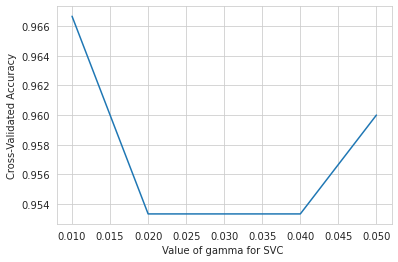

In [194]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

k Nearest Neighbours Classification

In [195]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

In [196]:
knn.fit(a_train,b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [197]:

knn.score(a_test,b_test)

0.9333333333333333

In [198]:
pre=knn.predict(a_test)
print(pre)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2]


In [199]:
print(confusion_matrix(b_test,pre))

[[16  0  0]
 [ 0 23  0]
 [ 0  4 17]]


In [200]:
k_list = list(range(1,31))
k_values = dict(n_neighbors=k_list)

In [201]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 14.


Grid Search CV 

In [202]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn,k_values, cv=5, scoring='accuracy')

In [203]:
grid.fit(a_train,b_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=9, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [204]:
grid.cv_results_



{'mean_fit_time': array([0.0008112 , 0.00083919, 0.00048571, 0.0003974 , 0.00053883,
        0.00085039, 0.00065203, 0.00044374, 0.00059676, 0.00042429,
        0.00040402, 0.00038967, 0.00042725, 0.00039043, 0.00041151,
        0.00041866, 0.00046673, 0.0004364 , 0.00053887, 0.00043035,
        0.00045018, 0.00041418, 0.00043674, 0.00041537, 0.00040631,
        0.0004055 , 0.00041962, 0.00042481, 0.00041852, 0.00040317]),
 'mean_score_time': array([0.00282025, 0.00286474, 0.00168328, 0.00159812, 0.00182076,
        0.00256572, 0.00190969, 0.00143185, 0.00181551, 0.00146198,
        0.00137   , 0.00137358, 0.0014976 , 0.00131125, 0.00133042,
        0.00142946, 0.00149326, 0.00146103, 0.00254374, 0.00147977,
        0.00145593, 0.00139389, 0.00147452, 0.00144372, 0.00138059,
        0.00139132, 0.00140247, 0.00145473, 0.001402  , 0.0014482 ]),
 'mean_test_score': array([0.96666667, 0.96666667, 0.97777778, 0.97777778, 0.97777778,
        0.98888889, 0.97777778, 0.97777778, 0.97777778, 0

Accuracy of KNN

In [205]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(b_test, pre)*100
print('The model accuracy is ' + str(round(accuracy, 2)) + ' %.')

The model accuracy is 93.33 %.


Cross Validation

<Figure size 432x288 with 0 Axes>

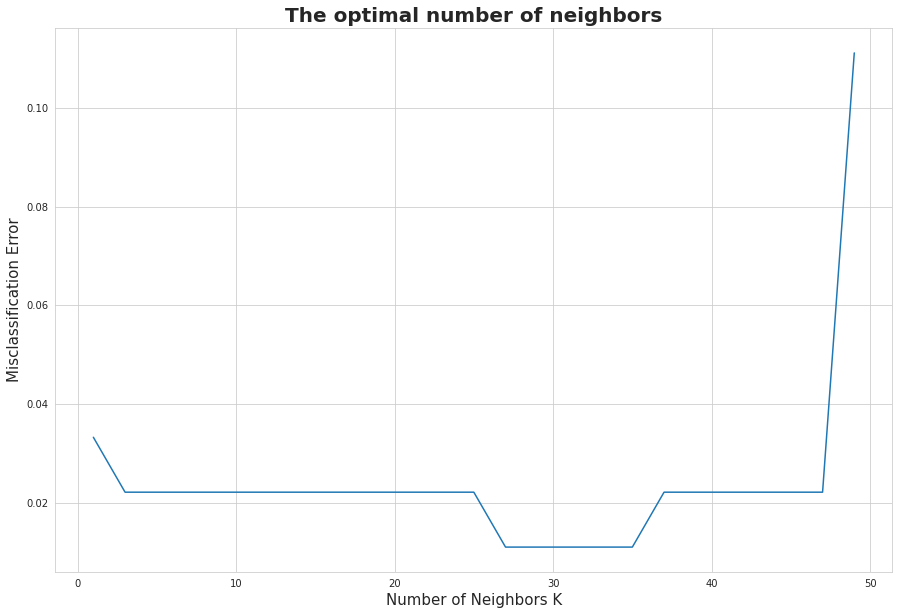

In [206]:
import seaborn as sns
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn3 = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn3, a_train, b_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

Randomised Search CV


In [207]:
from sklearn.model_selection import RandomizedSearchCV
k_range=list(range(1,31))
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)
knn2 = KNeighborsClassifier(n_neighbors = 1)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(a, b)
print(rand.best_score_)
print(rand.best_params_)
best_scores=[]
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(a, b)
    best_scores.append(round(rand.best_score_,3))
print(best_scores)


0.96
{'weights': 'uniform', 'n_neighbors': 22}
[0.967, 0.96, 0.973, 0.967, 0.967, 0.967, 0.967, 0.967, 0.967, 0.973, 0.96, 0.973, 0.973, 0.967, 0.967, 0.96, 0.967, 0.973, 0.96, 0.967]
